In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
import sklearn
print(sklearn.__version__)

1.4.0


In [ ]:
pip install --upgrade scikit-learn==1.4.0

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
phish_data = pd.read_csv('/content/drive/MyDrive/Phishing/phishing_data.csv')
phish_data.head()

,raw_html,url
0,"\n\n\n\n<!DOCTYPE html PUBLIC ""-//W3C//DTD XH...",http://spis.org.pl/Prezentacje-Seminarium/ent_...
1,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 T...",http://www.escortsx.co.za/~travelv/wp-content/...
2,"<br />\n<b>Parse error</b>: syntax error, une...",http://ateamhvacnj.com/components/com_tags/855...
3,"<html><head>\n<meta http-equiv=""refresh"" conte...",http://kidsplanet.cz/modules/Zone1/
4,<html>\n<head>\n<title>Error 403 - Forbidden</...,http://helpsacounts.esy.es/paypal/


In [ ]:
phish_data.drop('raw_html',axis=1,inplace=True)

In [ ]:
phish_data['label'] =1

In [ ]:
phish_data

,url,label
0,http://spis.org.pl/Prezentacje-Seminarium/ent_...,1
1,http://www.escortsx.co.za/~travelv/wp-content/...,1
2,http://ateamhvacnj.com/components/com_tags/855...,1
3,http://kidsplanet.cz/modules/Zone1/,1
4,http://helpsacounts.esy.es/paypal/,1
...,...,...
1738,http://www.lojadocasal.com/controllers/front/f...,1
1739,http://ofertaamericanas-001-site1.etempurl.com...,1
1740,http://www.abw-mc.com/capita/,1
1741,http://www.mondofferta.it/alert/amazon.com/ama...,1


In [ ]:
legit_data = pd.read_csv('/content/drive/MyDrive/Phishing/legitimate_dataset.csv')
legit_data.head()

,raw_html,screenshot,url,whois
0,"<!doctype html><html itemscope="""" itemtype=""ht...",C:\Users\siddh\OneDrive\Desktop\Phishing\Legit...,google.com,\nWhois v1.12 - Domain information lookup util...
1,"<!DOCTYPE html><html lang=""ms"" data-cast-api...",C:\Users\siddh\OneDrive\Desktop\Phishing\Legit...,youtube.com,\nWhois v1.12 - Domain information lookup util...
2,"<!DOCTYPE html>\n<html lang=""ms"" id=""facebook""...",C:\Users\siddh\OneDrive\Desktop\Phishing\Legit...,facebook.com,\nWhois v1.12 - Domain information lookup util...
3,"<html>\n<meta http-equiv=""refresh"" content=""0;...",C:\Users\siddh\OneDrive\Desktop\Phishing\Legit...,baidu.com,\nWhois v1.12 - Domain information lookup util...
4,"<!DOCTYPE html>\n<html id=""Stencil"" lang=""en-S...",C:\Users\siddh\OneDrive\Desktop\Phishing\Legit...,yahoo.com,\nWhois v1.12 - Domain information lookup util...


In [ ]:
legit_data.drop(columns=['raw_html', 'screenshot','whois'], axis=1, inplace=True)

In [ ]:
legit_data['label']=0

In [ ]:
legit_data=legit_data[:2000]

In [ ]:
legit_data

,url,label
0,google.com,0
1,youtube.com,0
2,facebook.com,0
3,baidu.com,0
4,yahoo.com,0
...,...,...
1995,lifeway.com,0
1996,infoempleo.com,0
1997,netlinksolution.com,0
1998,siamupdate.com,0


In [ ]:
data=pd.concat([legit_data, phish_data], axis=0)

In [ ]:
df = data.sample(frac=1).reset_index(drop=True)

In [ ]:
df.tail(20)

,url,label
3723,http://www.thewornmat.com/wp-includes/document/,1
3724,1hhhh.net,0
3725,vub.sk,0
3726,cnn.com,0
3727,discogs.com,0
3728,hao123.com,0
3729,centrelink.gov.au,0
3730,http://error-product-info-code-0x000084397.web...,1
3731,calend.ru,0
3732,http://www.ualub.com/images/portfolioslide/vie...,1


In [ ]:
pip install tldextract

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 941.8 kB/s eta 0:00:00


In [ ]:
print(df.dtypes)
print(df['url'].head())

url      object
label     int64
dtype: object
0    http://axisoffice.com/app/locale/65935ff91cb4e...
1    http://myaccount.signinpaypal.com.it.home.sett...
2                          http://omediacorp.org/file/
3              http://thecompanyown.com/Bells1/adobes/
4                                          zerodha.com
Name: url, dtype: object


In [ ]:
df

,url,label
0,http://axisoffice.com/app/locale/65935ff91cb4e...,1
1,http://myaccount.signinpaypal.com.it.home.sett...,1
2,http://omediacorp.org/file/,1
3,http://thecompanyown.com/Bells1/adobes/,1
4,zerodha.com,0
...,...,...
3738,google.ru,0
3739,novaposhta.ua,0
3740,kpn.com,0
3741,elnuevodia.com,0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import re
from urllib.parse import urlparse
import tldextract



# Print data info
print(df.dtypes)
print(df['url'].head())

# Safe feature extraction functions
def safe_extract_domain(url):
    if pd.isna(url) or not isinstance(url, str):
        return ''
    return tldextract.extract(str(url)).domain

def safe_extract_tld(url):
    if pd.isna(url) or not isinstance(url, str):
        return ''
    return tldextract.extract(str(url)).suffix

def safe_count_special_chars(url):
    if pd.isna(url) or not isinstance(url, str):
        return 0
    return len(re.findall(r'[!@#$%^&*(),.?":{}|<>]', str(url)))

def safe_url_length(url):
    if pd.isna(url) or not isinstance(url, str):
        return 0
    return len(str(url))

def safe_count_subdomains(url):
    if pd.isna(url) or not isinstance(url, str):
        return 0
    return len(urlparse(str(url)).netloc.split('.')) - 1

# Apply safe feature extraction
df['domain'] = df['url'].apply(safe_extract_domain)
df['tld'] = df['url'].apply(safe_extract_tld)
df['special_chars'] = df['url'].apply(safe_count_special_chars)
df['url_length'] = df['url'].apply(safe_url_length)
df['subdomain_count'] = df['url'].apply(safe_count_subdomains)

# Convert 'url' column to string type, replacing NaN with an empty string
df['url'] = df['url'].astype(str).replace('nan', '')

# TF-IDF vectorization of the full URL
tfidf = TfidfVectorizer(max_features=1000)
url_tfidf = tfidf.fit_transform(df['url'])

# Combine TF-IDF features with other extracted features
features = np.hstack((
    url_tfidf.toarray(),
    df[['special_chars', 'url_length', 'subdomain_count']].values
))

# Prepare the target variable
y = df['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Function to classify new URLs
def classify_url(url):
    # Extract features
    features = np.hstack((
        tfidf.transform([str(url)]).toarray(),
        [[
            safe_count_special_chars(url),
            safe_url_length(url),
            safe_count_subdomains(url)
        ]]
    ))
    return rf_classifier.predict(features)[0]

# Example usage


url      object
label     int64
dtype: object
0    http://axisoffice.com/app/locale/65935ff91cb4e...
1    http://myaccount.signinpaypal.com.it.home.sett...
2                          http://omediacorp.org/file/
3              http://thecompanyown.com/Bells1/adobes/
4                                          zerodha.com
Name: url, dtype: object
Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       422
           1       1.00      1.00      1.00       327

    accuracy                           1.00       749
   macro avg       1.00      1.00      1.00       749
weighted avg       1.00      1.00      1.00       749



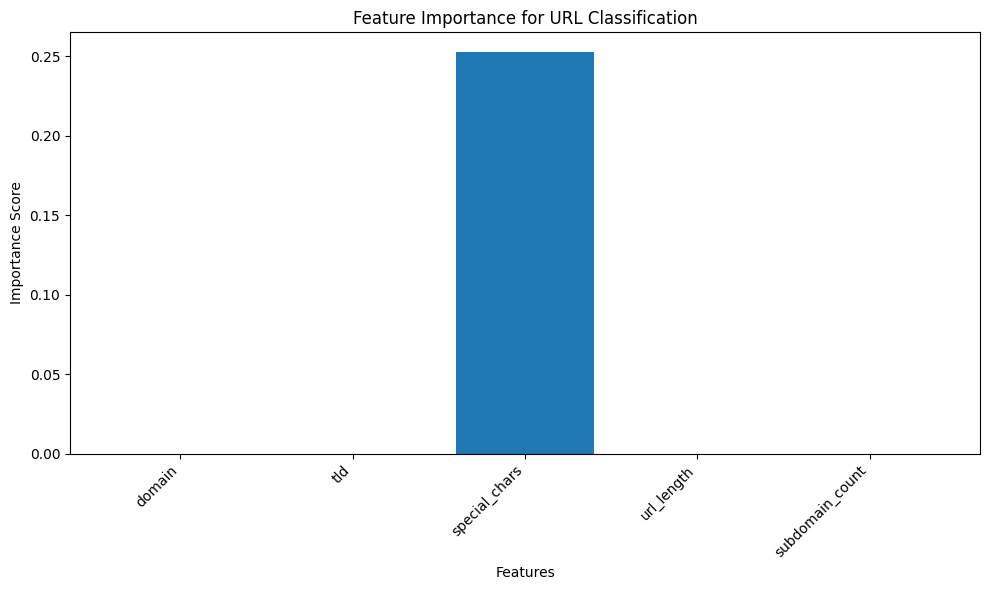

In [ ]:
import matplotlib.pyplot as plt

# Define the feature names
feature_names = ['domain', 'tld', 'special_chars', 'url_length', 'subdomain_count']

# Get the importance scores for these features
feature_importances = []
for feature in feature_names:
    if feature in ['special_chars', 'url_length', 'subdomain_count']:
        # These features are at the end of the feature array
        index = -3 + feature_names.index(feature)
        feature_importances.append(rf_classifier.feature_importances_[index])
    else:
        # For 'domain' and 'tld', we'll use the maximum importance of any TF-IDF feature
        # that includes this feature name, or 0 if none found
        tfidf_features = tfidf.get_feature_names_out()
        try:
            max_importance = max(
                rf_classifier.feature_importances_[i]
                for i, tfidf_feature in enumerate(tfidf_features)
                if feature in tfidf_feature
            )
        except ValueError:
            # If no matching TF-IDF features found, assign importance of 0
            max_importance = 0
        feature_importances.append(max_importance)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance for URL Classification')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

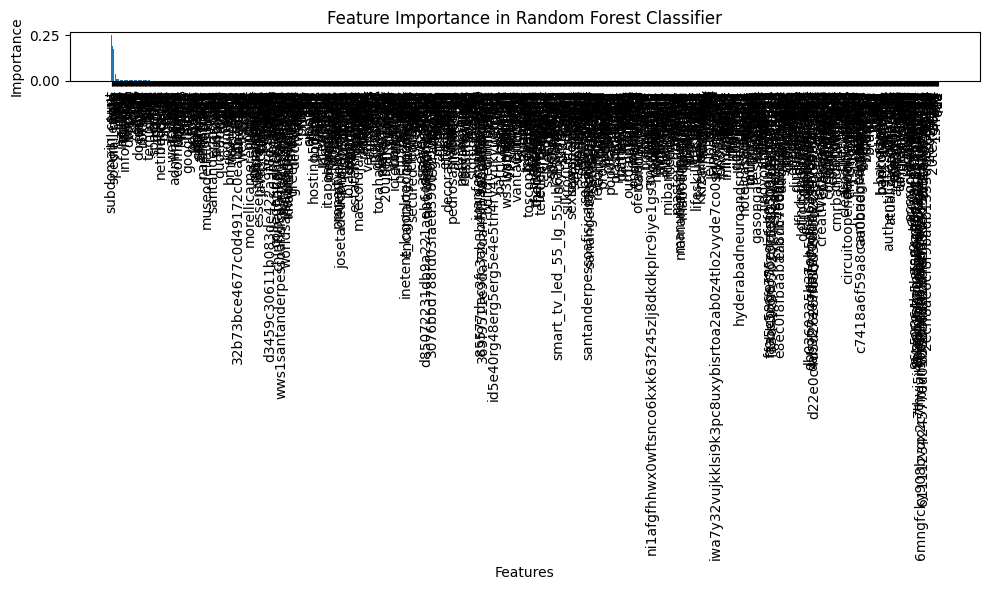

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances
importances = rf_classifier.feature_importances_

# Get feature names
feature_names = list(tfidf.get_feature_names_out()) + ['special_chars', 'url_length', 'subdomain_count']

# Sort features by importance
feature_importance = sorted(zip(importances, feature_names), reverse=True)

# Separate the importances and names
importances, feature_names = zip(*feature_importance)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances)
plt.xticks(range(len(importances)), feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest Classifier')
plt.tight_layout()
plt.show()

In [ ]:
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    print(f'Training {name}...')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Accuracy for {name}: {accuracy_score(y_test, y_pred)}")
    print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred)}\n")

# Function to classify new URLs using a specific model
def classify_url(url, model):
    # Extract features
    features = np.hstack((
        tfidf.transform([str(url)]).toarray(),
        [[
            safe_count_special_chars(url),
            safe_url_length(url),
            safe_count_subdomains(url)
        ]]
    ))
    return model.predict(features)[0]

# Example usage


Training Random Forest...
Accuracy for Random Forest: 1.0
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       407
           1       1.00      1.00      1.00       342

    accuracy                           1.00       749
   macro avg       1.00      1.00      1.00       749
weighted avg       1.00      1.00      1.00       749


Training Logistic Regression...
Accuracy for Logistic Regression: 0.9986648865153538
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       407
           1       1.00      1.00      1.00       342

    accuracy                           1.00       749
   macro avg       1.00      1.00      1.00       749
weighted avg       1.00      1.00      1.00       749


Training Support Vector Machine...
Accuracy for Support Vector Machine: 0.9879839786381842
Classification Report 

In [ ]:
import pickle
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Save the trained SVM model to a .pkl file
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(svm_model, file)

# Save the TF-IDF vectorizer to a .pkl file (you'll need this for feature extraction when using the model later)
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf, file)


Accuracy: 0.9879839786381842

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       407
           1       0.99      0.98      0.99       342

    accuracy                           0.99       749
   macro avg       0.99      0.99      0.99       749
weighted avg       0.99      0.99      0.99       749



In [ ]:
with open('svm_model.pkl', 'rb') as file:
    loaded_svm_model = pickle.load(file)

with open('tfidf_vectorizer.pkl', 'rb') as file:
    loaded_tfidf = pickle.load(file)

# Function to classify new URLs using the loaded model
def classify_url(url, model, vectorizer):
    # Extract features
    features = np.hstack((
        vectorizer.transform([str(url)]).toarray(),
        [[
            safe_count_special_chars(url),
            safe_url_length(url),
            safe_count_subdomains(url)
        ]]
    ))
    return model.predict(features)[0]

# Example usage
example_url = 'femina.mk'
classification = classify_url(example_url, loaded_svm_model, loaded_tfidf)
print(f'The URL "{example_url}" is classified as {classification}')

The URL "femina.mk" is classified as 0


In [ ]:
df['label'][2002]

1

In [ ]:
example_url = 'http://vannessamoraes.com/wp-includes/	'
chosen_model = models['Support Vector Machine']  # or any other model from the models dictionary
classification = classify_url(example_url, chosen_model)
print(f'The URL "{example_url}" is classified as {classification}')

The URL "http://vannessamoraes.com/wp-includes/	" is classified as 1


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import re
from urllib.parse import urlparse
import pickle

# Assuming df is already loaded with the correct data
# Safe feature extraction functions
def safe_extract_domain(url):
    if pd.isna(url) or not isinstance(url, str):
        return ''
    parsed_url = urlparse(url)
    domain = parsed_url.netloc
    if domain.startswith('www.'):
        domain = domain[4:]
    return domain

def safe_count_special_chars(url):
    if pd.isna(url) or not isinstance(url, str):
        return 0
    return len(re.findall(r'[!@#$%^&*(),.?":{}|<>]', str(url)))

def safe_url_length(url):
    if pd.isna(url) or not isinstance(url, str):
        return 0
    return len(str(url))

def safe_count_subdomains(url):
    if pd.isna(url) or not isinstance(url, str):
        return 0
    return len(urlparse(str(url)).netloc.split('.')) - 1

# Apply safe feature extraction
df['domain'] = df['url'].apply(safe_extract_domain)
df['special_chars'] = df['url'].apply(safe_count_special_chars)
df['url_length'] = df['url'].apply(safe_url_length)
df['subdomain_count'] = df['url'].apply(safe_count_subdomains)

# Convert 'url' column to string type, replacing NaN with an empty string
df['url'] = df['url'].astype(str).replace('nan', '')

# TF-IDF vectorization of the full URL
tfidf = TfidfVectorizer(max_features=1000)
url_tfidf = tfidf.fit_transform(df['url'])

# Combine TF-IDF features with other extracted features
features = np.hstack((
    url_tfidf.toarray(),
    df[['special_chars', 'url_length', 'subdomain_count']].values
))

# Prepare the target variable
y = df['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)

# Train the SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Save the trained SVM model to a .pkl file



Accuracy: 0.9919893190921228

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       418
           1       0.99      0.99      0.99       331

    accuracy                           0.99       749
   macro avg       0.99      0.99      0.99       749
weighted avg       0.99      0.99      0.99       749



In [ ]:
import os

data_dir = '/mnt/data'
os.makedirs(data_dir, exist_ok=True)  # Create the directory if it doesn't exist


In [ ]:
svm_model_filename = os.path.join(data_dir, 'svm_model.pkl')
with open(svm_model_filename, 'wb') as file:
    pickle.dump(svm_model, file)

In [ ]:
import pickle
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

# Load the SVM model
with open('svm_model.pkl', 'rb') as file:
    svm_model = pickle.load(file)

# Load the TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'rb') as file:
    tfidf = pickle.load(file)
